In [42]:
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Import Data

In [27]:
power = pd.read_csv('gen.csv')
power["dist"] = None
power["croswalkIdx"] = None
fac = pd.read_csv('facility.csv')
gas_dict = {"Pipeline Natural Gas": "ng", "Natural Gas": "ng", "Coal": "coal", "Wood": "wood"}

## Define Distance Functions

In [28]:
def manhatton_distance(x1, x2, y1, y2):
    return abs(x1 - x2) + abs(y1 - y2)

def euclidean_distance(x1, x2, y1, y2):
    return np.sqrt((x1 - x2)**2 + (y1 - y2)**2)

## Find Closest Generator in facilities

In [29]:
temp = []
idx = []
for j in range(len(power)):
    m = sys.maxsize
    id = -1
    for i in range(len(fac)):
        dist = euclidean_distance(power.loc[j, 'lat'], fac.loc[i, 'Latitude'], power.loc[j, 'long'], fac.loc[i, 'Longitude'])
        if dist < m:
            m = dist
            id = i
    temp.append(m)
    idx.append(id)

power["dist"] = temp
power["croswalkIdx"] = idx

## Merging Together

In [51]:
cross = power.merge(fac, left_on='croswalkIdx', right_index=True)
cross = cross.loc[cross["dist"] < 0.1].reset_index(drop=True)

## Match Fuel Types

In [52]:
mask = []
for i in range(len(cross)):
    if cross.loc[i, 'Primary Fuel Type'] in gas_dict and cross.loc[i, 'fuel'] == gas_dict[cross.loc[i, 'Primary Fuel Type']]:
        mask.append(True)
    else:
        mask.append(False)
cross = cross.loc[mask]
cross = cross[["fuel", "Primary Fuel Type"]]

<AxesSubplot:xlabel='fuel', ylabel='Count'>

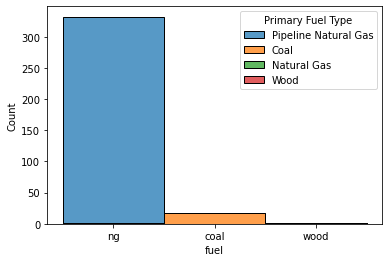

In [53]:
sns.histplot(cross, x="fuel", hue="Primary Fuel Type", multiple="stack")

In [16]:
cross[["Facility Name", "Facility ID", "Pg", "Qg", "Qmax", "Qmin", "Pmax", "Pmin", "fuel", "lat", "long"]].to_csv("Texas7kCrosswalk.csv", index=False)